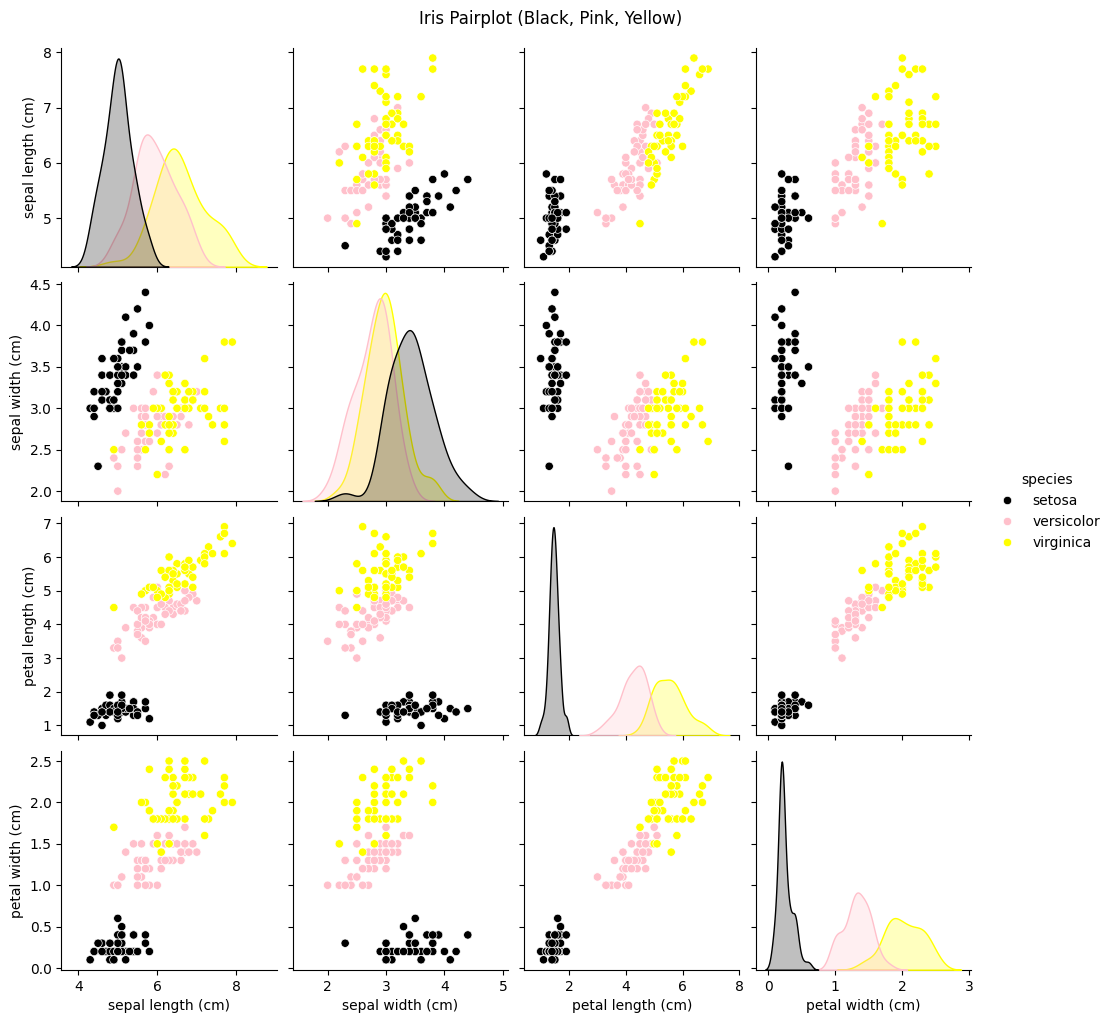

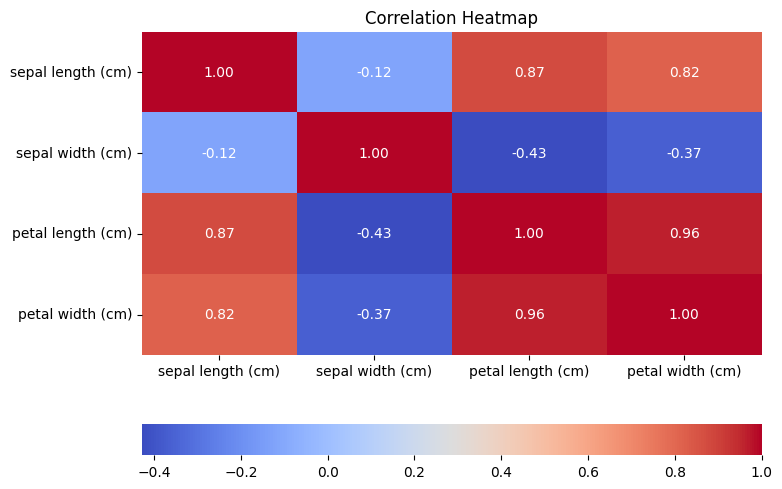


Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



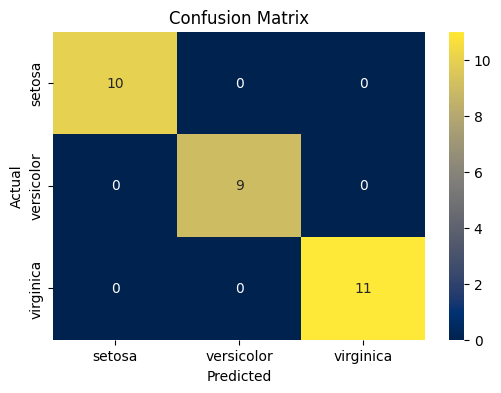


Sample Predictions:
Features: [5.1, 3.5, 1.4, 0.2] -> Predicted Species: setosa
Features: [6.7, 3.0, 5.2, 2.3] -> Predicted Species: virginica
Features: [5.9, 3.0, 4.2, 1.5] -> Predicted Species: versicolor


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels
feature_names = iris.feature_names
class_names = iris.target_names

# Create a DataFrame for visualization
df = pd.DataFrame(data=X, columns=feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Pairplot with black, pink, and yellow
sns.pairplot(df, hue='species', palette={'setosa': 'black', 'versicolor': 'pink', 'virginica': 'yellow'})
plt.suptitle("Iris Pairplot (Black, Pink, Yellow)", y=1.02)
plt.show()

# Correlation heatmap (numeric columns only)
plt.figure(figsize=(8, 6))
numeric_df = df.drop(columns=['species'])  # Drop non-numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'orientation': 'horizontal'})
plt.title("Correlation Heatmap")
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="cividis", fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Sample predictions
sample_data = [[5.1, 3.5, 1.4, 0.2], [6.7, 3.0, 5.2, 2.3], [5.9, 3.0, 4.2, 1.5]]
predictions = model.predict(sample_data)
predicted_species = [class_names[pred] for pred in predictions]
print("\nSample Predictions:")
for data, species in zip(sample_data, predicted_species):
    print(f"Features: {data} -> Predicted Species: {species}")